In [148]:
import sympy as sp
import numpy as np 
import math

In [149]:
def distanc(x,y):
    r1=[]
    for i in range(len(x)):
        r1.append( abs((x[i])**2 - (y[i])**2) )
        return np.sqrt( sum(r1) )


Task 1

In [150]:
def distance(x,y):
    r1=[]
    r2=[]
    r3=[]
    for i in range(len(x)):
        r1.append( abs(x[i] - y[i]) )
        r2.append( abs(x[i] - y[i]) )
        r3.append( abs((x[i]) - (y[i]))**2 )
    print(f"в 1 метрике расстояние между {x} и {y} = {max(r1)} " )
    print(f"в 2 метрике расстояние между {x} и {y} = {sum(r2)} " )
    print(f"в 3 метрике расстояние между {x} и {y} = {np.sqrt( sum(r3) )} \n" )
O = [0,0]
A = [3,4]
B = [4,3]
C = [1,2,3,4]
D = [7,3,4,200]
distance(O,A)
distance(O,B)
distance(C,D)

в 1 метрике расстояние между [0, 0] и [3, 4] = 4 
в 2 метрике расстояние между [0, 0] и [3, 4] = 7 
в 3 метрике расстояние между [0, 0] и [3, 4] = 5.0 

в 1 метрике расстояние между [0, 0] и [4, 3] = 4 
в 2 метрике расстояние между [0, 0] и [4, 3] = 7 
в 3 метрике расстояние между [0, 0] и [4, 3] = 5.0 

в 1 метрике расстояние между [1, 2, 3, 4] и [7, 3, 4, 200] = 196 
в 2 метрике расстояние между [1, 2, 3, 4] и [7, 3, 4, 200] = 204 
в 3 метрике расстояние между [1, 2, 3, 4] и [7, 3, 4, 200] = 196.0969148150985 



Task 2

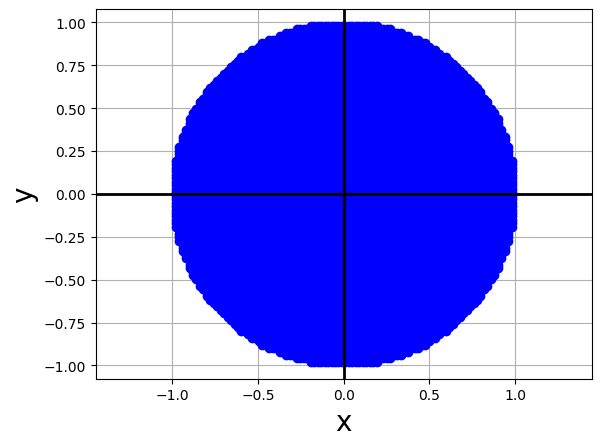

<function __main__.taxi(point1, point2)>

In [151]:
def euclid(point1, point2):
    return np.linalg.norm(point1 - point2)

def taxi(point1, point2):
    return np.sum(np.abs(point1 - point2))

def metrika1(point1, point2):
    return max(np.abs(point1 - point2))


def graf(metrica, center, radius):
    N=100
    x = np.linspace(center[0] - radius, center[0] + radius, N)
    y = np.linspace(center[1] - radius, center[1] + radius, N)
    
    for i in range(N):
        for j in range(N):
            point = np.array([x[i], y[j]])
            if metrica(point, center) <= radius:
                plt.plot(x[i], y[j], 'bo')  # Точка внутри шара
            
                
   
    
    plt.axhline(y=0, color="k", linewidth=2)
    plt.axvline(x=0, color="k", linewidth=2)
    plt.grid()
    plt.axis('equal')
    
    plt.xlabel("x", fontsize=20)
    plt.ylabel("y", fontsize=20)
    plt.show()


graf(euclid, [0, 0], 1)
taxi

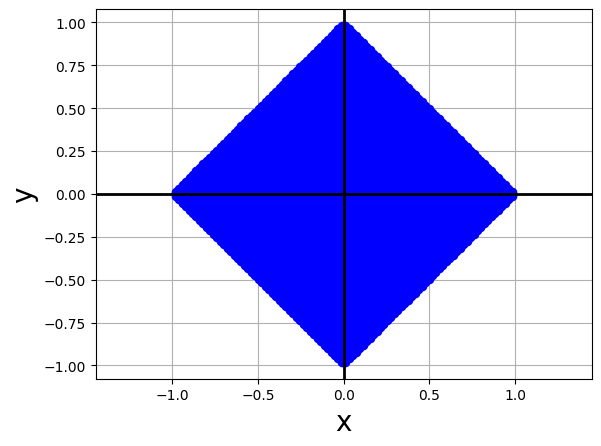

In [152]:
graf(taxi, [0, 0], 1)

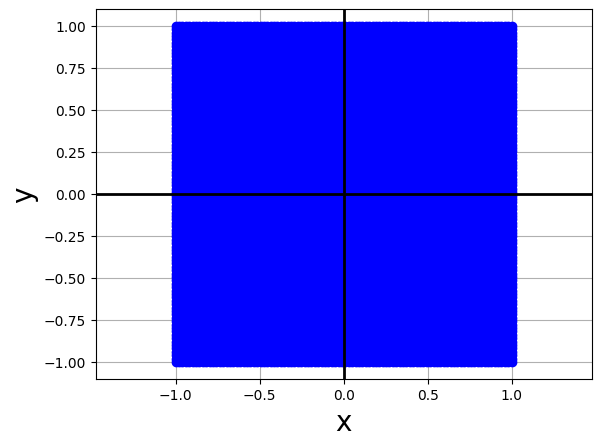

In [153]:
graf(metrika1, [0, 0], 1)

Task 3 

In [154]:

x1, N = 3, 10

def shatie(f, n, x1):
    if n == 0: return 0
    if n == 1:
        return x1
    if type(f.subs(x, shatie(f, n - 1, x1))) != int:
        return f.subs(x, shatie(f, n - 1, x1) ).evalf()
    return f.subs(x, shatie(f, n - 1, x1) ) 
    

x = sp.symbols("x")
for i in range(1,N+1):
    print(f"n = {i:2} | x_n = {shatie(sp.tan(x), i, x1)}")
print(shatie(sp.tan(x), 2, 3))

n =  1 | x_n = 3
n =  2 | x_n = -0.142546543074278
n =  3 | x_n = -0.143519947784929
n =  4 | x_n = -0.144513541783747
n =  5 | x_n = -0.145528032164621
n =  6 | x_n = -0.146564161163058
n =  7 | x_n = -0.147622708432909
n =  8 | x_n = -0.148704493505944
n =  9 | x_n = -0.149810378451857
n = 10 | x_n = -0.150941270758321
-0.142546543074278


Task 4

In [155]:
# tg(x) = x

def fx_x(f, alpha, x1, epsilon, xs = []):
    a = sp.diff( f + sp.pi, x)
    sp.pprint(a)
    if xs != []:
        alpha = float(max(a.subs(x, xs[i]).evalf() for i in range(len(xs))))
    n = np.log(epsilon * (1 - alpha)) 
    n -= np.log(distanc([x1], [ float(shatie(f, 2, x1) ) ] ) )
    n /= np.log(alpha)
    return shatie(f, int(np.ceil(n)), x1)
    

x = sp.symbols("x")
print(fx_x(sp.atan(x) + np.pi, 0.2884, 3, epsilon = .00001))
print()
print(fx_x(sp.atan(x) + 3.5*np.pi, 0.2884, 3, epsilon = .00001, xs = [3.5*sp.pi, 4*sp.pi]))

  1   
──────
 2    
x  + 1
4.49340945790894

  1   
──────
 2    
x  + 1
12.4848829405081


Task 5

In [156]:

# B + CX = X
# ВАРИАНТ 21
A = np.matrix([ [ 0.55, 0.43,  4.15], 
                [7.17,  -0.31,  -0.25], 
                [ -0.14,  -7.32, 0.43] ])
B = np.matrix([ [-3.12 ], 
                [ 2.34 ], 
                [ 4.01 ] ])
E = np.eye(3)

C = -A + E
# print(C)
# print("1.", C[0])
# print("2.", C[1])
# print("3.", C[2])

def _(Matrix: np.matrix):
    id_ = []
    for i in range(Matrix.shape[0]):
        max_ = np.abs(Matrix[i, 0])
        for j in range(1, Matrix.shape[1]):
            if (np.abs(Matrix[i, j]) > max_): max_ = np.abs(Matrix[i, j])
        for j in range(Matrix.shape[1]):
            if (np.abs(Matrix[i, j]) == max_): id_.append(j)
    return id_

def rearange(Matrix: np.matrix, order: list[int], Equal_Matrix: np.matrix):
    for i in range(Matrix.shape[0]):
        for j in range(Matrix.shape[0] - 1):
            if order[j] > order[j + 1]:
                order[j], order[j + 1] = order[j + 1], order[j]
                Matrix[[j, j + 1]] = Matrix[[j + 1, j]]
                Equal_Matrix[[j, j + 1]] = Equal_Matrix[[j + 1, j]]
print(A)
rearange(A, _(A), B)
print("---------------------")
print(A)
print(B)
print('\n',max([ sum( [abs(C[k, j]) for j in range(3)] ) for k in range(3) ]),">1")

[[ 0.55  0.43  4.15]
 [ 7.17 -0.31 -0.25]
 [-0.14 -7.32  0.43]]
---------------------
[[ 7.17 -0.31 -0.25]
 [-0.14 -7.32  0.43]
 [ 0.55  0.43  4.15]]
[[ 2.34]
 [ 4.01]
 [-3.12]]

 8.73 >1


In [157]:
def normalize(Matrix: np.matrix, Equal_Matrix: np.matrix):
    values = [Matrix[i, i] for i in range(Matrix.shape[0])]
    for i in range(Matrix.shape[0]):
        for j in range(Matrix.shape[1]):
            Matrix[i,j] /= values[i]
        Equal_Matrix[i] /= values[i]

normalize(A, B)
C = E - A
print(C)
print("\n", B)
print('\n',max([ sum( [abs(C[k, j]) for j in range(3)] ) for k in range(3) ])," < 1")


[[ 0.          0.0432357   0.0348675 ]
 [-0.01912568  0.          0.05874317]
 [-0.13253012 -0.10361446  0.        ]]

 [[ 0.32635983]
 [-0.54781421]
 [-0.75180723]]

 0.23614457831325303  < 1


In [158]:
def solution(Matrix: np.matrix, Equal_matrix: np.matrix, epsilon: int):
    X = Equal_matrix
    X1 = B + Matrix * X

    while (abs(X[0,0] - X1[0,0]) > epsilon):
        X = X1
        X1 = B + Matrix * X
    
    return X

epsilon = .0001
print(solution(C, B, epsilon))

print("\n\nChecking:\n", A * solution(C, B, epsilon) - B)

# P.S -3.30524358e-05 это очень близко к нулю

[[ 0.27524103]
 [-0.59574375]
 [-0.72641716]]


Checking:
 [[-3.30524358e-05]
 [ 6.67770617e-06]
 [ 1.40134513e-04]]
